In [1]:
#Importing the required Libraries
import plotly.graph_objects as go
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
plt.style.use('fivethirtyeight')

In [2]:
asset='AAPL' #We are selecting stock of Apple for analysis.
data=yf.download(asset,interval='1d',start='2016-10-01',end='2023-10-04')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-03,28.177500,28.262501,28.070000,28.129999,26.079733,86807200
2016-10-04,28.264999,28.577499,28.157499,28.250000,26.190985,118947200
2016-10-05,28.350000,28.415001,28.172501,28.262501,26.202574,85812400
2016-10-06,28.424999,28.584999,28.282499,28.472500,26.397268,115117200
2016-10-07,28.577499,28.639999,28.377501,28.514999,26.436668,97433600
...,...,...,...,...,...,...
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800
2023-09-28,169.339996,172.029999,167.619995,170.690002,170.690002,56294400
2023-09-29,172.020004,173.070007,170.339996,171.210007,171.210007,51814200


In [3]:
# Store the data
df=data

In [5]:
# Candlestick chart of the data
figure=go.Figure(
    data=[
          go.Candlestick(
              x=df.index,
              low=df['Low'],
              high=df['High'],
              close=df['Close'],
              open=df['Open'],
              increasing_line_color='green',
              decreasing_line_color='red'
          )

    ]
)
figure.update_layout(
    title='Apple Price',
    yaxis_title='Apple Stock Price($)',
    xaxis_title='Date'
)
figure.show()



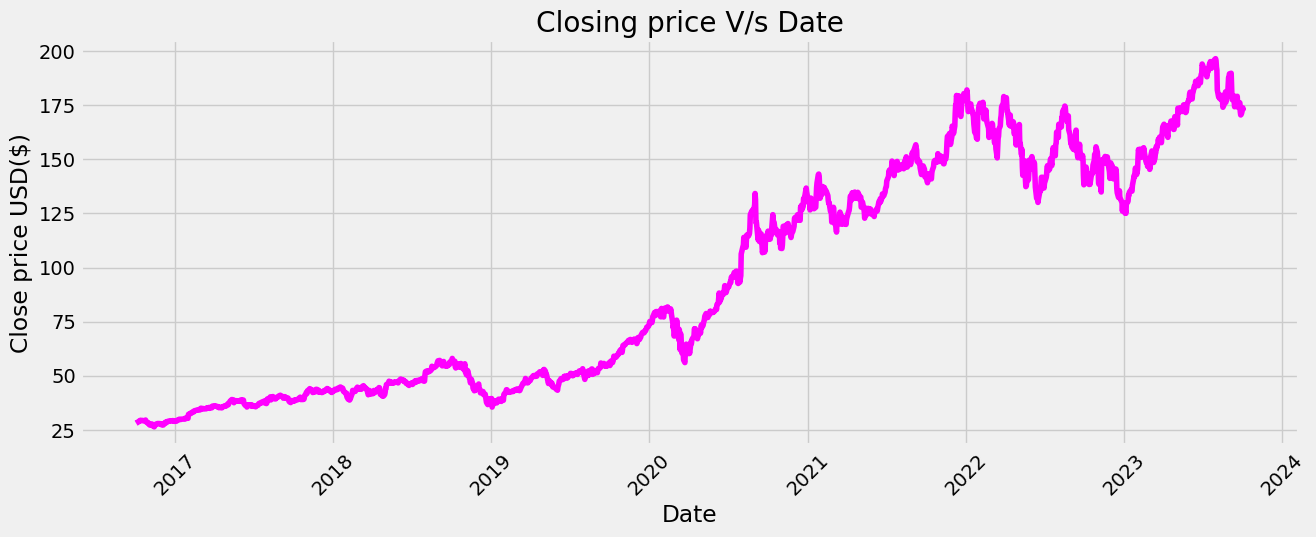

In [6]:
plt.figure(figsize=(14,5))
plt.plot(df['Close'],color='magenta',label='Closing price')
plt.xlabel('Date')
plt.ylabel('Close price USD($)')
plt.xticks(rotation=45)
plt.title("Closing price V/s Date")
plt.show()

In [7]:
# So The first indicator that we will take use of is Bollinger bands in this strategy.

#So,firstly calculate the simple moving average of period 30 day.
df['Midband']=df['Close'].rolling(window=30).mean()

#Calculate the upper band, lower band & standard deviation
#St dev:
df['st_d']=df['Close'].rolling(window=30).std()
#cal upper band
df['Ub']=df['Midband']+1.5*df['st_d']
#cal lower band
df['Lb']=df['Midband']-1.5*df['st_d']
df

,Open,High,Low,Close,Adj Close,Volume,Midband,st_d,Ub,Lb
Date,,,,,,,,,,
2016-10-03,28.177500,28.262501,28.070000,28.129999,26.079733,86807200,NaN,NaN,NaN,NaN
2016-10-04,28.264999,28.577499,28.157499,28.250000,26.190985,118947200,NaN,NaN,NaN,NaN
2016-10-05,28.350000,28.415001,28.172501,28.262501,26.202574,85812400,NaN,NaN,NaN,NaN
2016-10-06,28.424999,28.584999,28.282499,28.472500,26.397268,115117200,NaN,NaN,NaN,NaN
2016-10-07,28.577499,28.639999,28.377501,28.514999,26.436668,97433600,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800,178.407333,5.029778,185.952001,170.862666
2023-09-28,169.339996,172.029999,167.619995,170.690002,170.690002,56294400,178.211333,5.214999,186.033832,170.388834
2023-09-29,172.020004,173.070007,170.339996,171.210007,171.210007,51814200,178.118333,5.316578,186.093201,170.143466


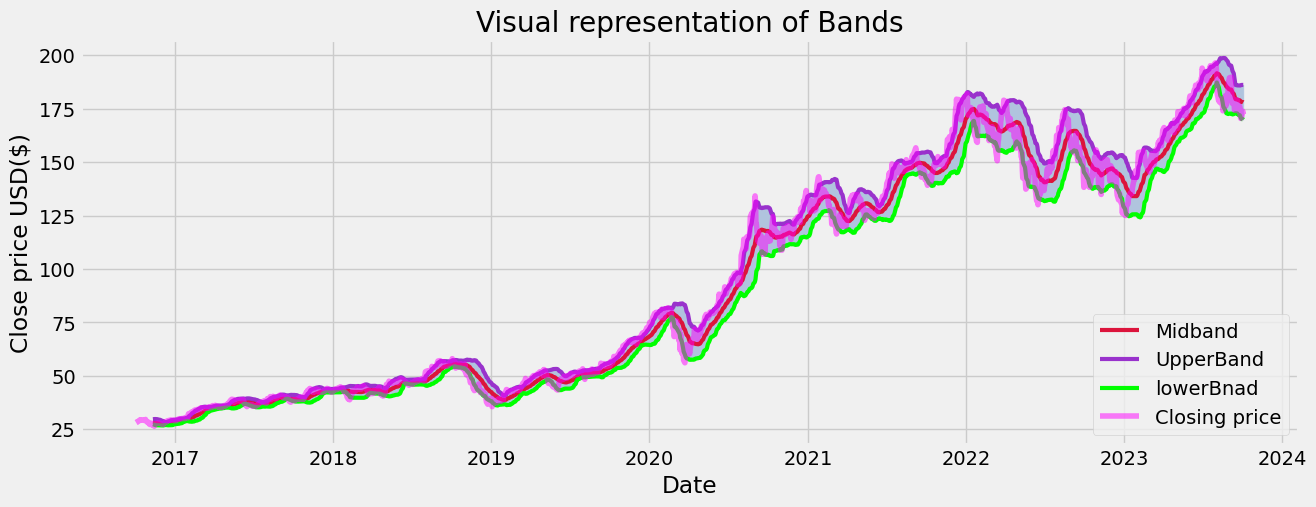

In [11]:
#Visually showing that how thw bands will look like
plt.figure(figsize=(14,5))
plt.fill_between(df.index,df['Ub'],df['Lb'],color='lightsteelblue')
plt.plot(df['Midband'],color='crimson',lw=3,label='Midband')
plt.plot(df['Ub'],color='darkorchid',lw=3,label='UpperBand')
plt.plot(df['Lb'],color='lime',lw=3,label='lowerBnad')
plt.plot(df['Close'],color='magenta',label='Closing price',alpha=0.5)
plt.title("Visual representation of Bands")
plt.legend(loc='lower right')
plt.xlabel('Date')
plt.ylabel('Close price USD($)')
plt.show()




In [9]:
#This prgram uses On-Balance volume (OBV) to determine when to buy and sell stock
#Calculate the On balnce Volume(OBV)
def obv(data):
  OBV=[]
  OBV.append(0)

#Loop through the dataset (close price) from second row
  for i in range(1,len(data.Close)):
    if data['Close'][i]>data['Close'][i-1]:
      OBV.append(OBV[-1] + data['Volume'][i])  #Add the volume to the Previous row OBV if close price of current day is greater than previous day close price.
    elif data['Close'][i]<data['Close'][i-1]:
      OBV.append(OBV[-1] - data['Volume'][i])  #subtract the volume from the Previous row OBV if close price of current day is smaller than previous day close price.
    else:
      OBV.append(OBV[-1])

  data['OBV']=OBV
  data['OBV_EMA']=data['OBV'].ewm(span=20).mean();  #Find the 20 day Exponential moving average of OBV.
  return data

In [10]:
obv(df)

,Open,High,Low,Close,Adj Close,Volume,Midband,st_d,Ub,Lb,OBV,OBV_EMA
Date,,,,,,,,,,,,
2016-10-03,28.177500,28.262501,28.070000,28.129999,26.079733,86807200,NaN,NaN,NaN,NaN,0,0.000000e+00
2016-10-04,28.264999,28.577499,28.157499,28.250000,26.190985,118947200,NaN,NaN,NaN,NaN,118947200,6.244728e+07
2016-10-05,28.350000,28.415001,28.172501,28.262501,26.202574,85812400,NaN,NaN,NaN,NaN,204759600,1.147035e+08
2016-10-06,28.424999,28.584999,28.282499,28.472500,26.397268,115117200,NaN,NaN,NaN,NaN,319876800,1.739339e+08
2016-10-07,28.577499,28.639999,28.377501,28.514999,26.436668,97433600,NaN,NaN,NaN,NaN,417310400,2.328046e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800,178.407333,5.029778,185.952001,170.862666,6094034500,6.193005e+09
2023-09-28,169.339996,172.029999,167.619995,170.690002,170.690002,56294400,178.211333,5.214999,186.033832,170.388834,6150328900,6.188940e+09
2023-09-29,172.020004,173.070007,170.339996,171.210007,171.210007,51814200,178.118333,5.316578,186.093201,170.143466,6202143100,6.190198e+09


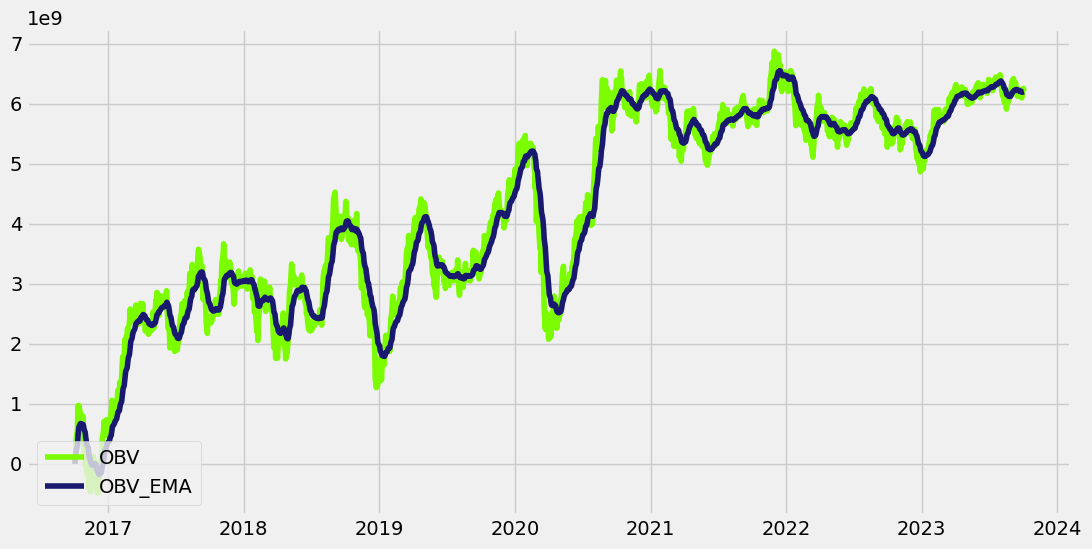

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df['OBV'],label='OBV',color='lawngreen')
plt.plot(df['OBV_EMA'],label='OBV_EMA',color='midnightblue')

plt.legend(loc='lower left')
plt.show()

In [11]:
def RSI(data):

  data['price change']=data['Close'].pct_change()
  gain=data['price change'].apply(lambda x: x if x>0 else 0 )
  loss=data['price change'].apply(lambda x: abs(x) if x<0 else 0 )
  avg_gain=gain.ewm(span=16).mean()
  avg_loss=loss.ewm(span=16).mean()
  RS=avg_gain/avg_loss
  RSI=(100-(100/(1+RS)))
  data['RSI']=RSI
  data['Overbought']=90  #Upper threshold
  data['Oversold']=30

  return data

In [12]:
RSI(df) #Calling the function for df


,Open,High,Low,Close,Adj Close,Volume,Midband,st_d,Ub,Lb,OBV,OBV_EMA,price change,RSI,Overbought,Oversold
Date,,,,,,,,,,,,,,,,
2016-10-03,28.177500,28.262501,28.070000,28.129999,26.079733,86807200,NaN,NaN,NaN,NaN,0,0.000000e+00,NaN,NaN,90,30
2016-10-04,28.264999,28.577499,28.157499,28.250000,26.190985,118947200,NaN,NaN,NaN,NaN,118947200,6.244728e+07,0.004266,100.000000,90,30
2016-10-05,28.350000,28.415001,28.172501,28.262501,26.202574,85812400,NaN,NaN,NaN,NaN,204759600,1.147035e+08,0.000443,100.000000,90,30
2016-10-06,28.424999,28.584999,28.282499,28.472500,26.397268,115117200,NaN,NaN,NaN,NaN,319876800,1.739339e+08,0.007430,100.000000,90,30
2016-10-07,28.577499,28.639999,28.377501,28.514999,26.436668,97433600,NaN,NaN,NaN,NaN,417310400,2.328046e+08,0.001493,100.000000,90,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800,178.407333,5.029778,185.952001,170.862666,6094034500,6.193005e+09,-0.008897,32.231193,90,30
2023-09-28,169.339996,172.029999,167.619995,170.690002,170.690002,56294400,178.211333,5.214999,186.033832,170.388834,6150328900,6.188940e+09,0.001526,33.365471,90,30
2023-09-29,172.020004,173.070007,170.339996,171.210007,171.210007,51814200,178.118333,5.316578,186.093201,170.143466,6202143100,6.190198e+09,0.003046,35.797423,90,30


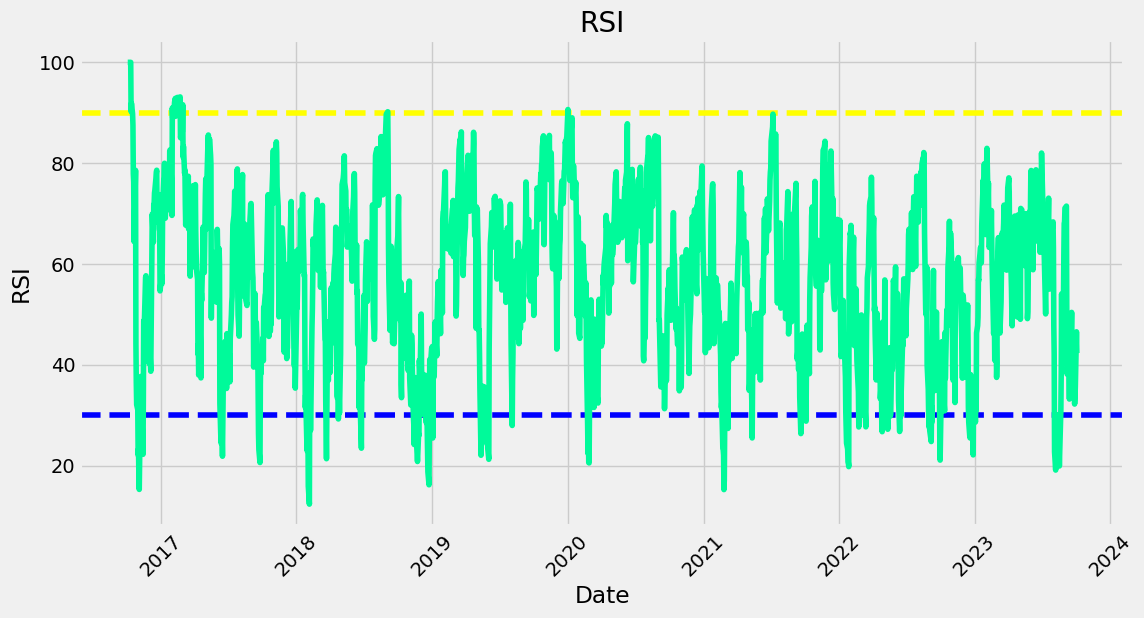

In [13]:
plt.figure(figsize=(12,6))
plt.axhline(30,linestyle='--',color='blue')
plt.axhline(90,linestyle='--',color='yellow')
plt.plot(df['RSI'],label='RSI',color='mediumspringgreen')
plt.title('RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.xticks(rotation=45)
plt.show()

In [14]:
#Defining a function to indicate where to buy and where to sell
#Buy and sell the stock when two of the three indicators agree


def buy_sell(signal):
  portfolio=10000   #Take initial Portfolio value as 10000
  port_value=[]
  buy=[]
  sell=[]
  pos=[]
  profits=[]
  position=0;
  for i in range(len(signal)):
    if ((signal['Close'][i]>signal['Ub'][i] and signal['OBV'][i]<signal['OBV_EMA'][i]) or (signal['Close'][i]>signal['Ub'][i]  and signal['RSI'][i]>signal['Overbought'][i]) or (signal['OBV'][i]<signal['OBV_EMA'][i] and signal['RSI'][i]>signal['Overbought'][i] )) and position==1 :
      sell.append(signal['Open'][i+1])
      buy.append(np.nan)
      profits.append(n*(signal['Open'][i+1])-buy_at)   #We are selling it at the open price of the next day and we are calculating the profits.
      portfolio+=n*(signal['Open'][i+1])-buy_at
      port_value.append(portfolio)
      position=0
    elif ((signal['Close'][i]<signal['Lb'][i] and signal['OBV'][i]>signal['OBV_EMA'][i]) or (signal['Close'][i]<signal['Lb'][i] and signal['RSI'][i]<signal['Oversold'][i]) or (signal['OBV'][i]>signal['OBV_EMA'][i] and signal['RSI'][i]<signal['Oversold'][i] ) )and position==0:
      n=10000/signal['Open'][i+1]
      buy_at=n*signal['Open'][i+1]    #We are buying the asset at the open price of the next day.
      buy.append(signal['Open'][i+1])
      sell.append(np.nan)
      position=1
    else:
      buy.append(np.nan)
      sell.append(np.nan)
    pos.append(position)


  signal['Position']=pos
  return (buy,sell,profits,port_value)

In [21]:

df['buy']=buy_sell(df)[0]
df['sell']=buy_sell(df)[1]




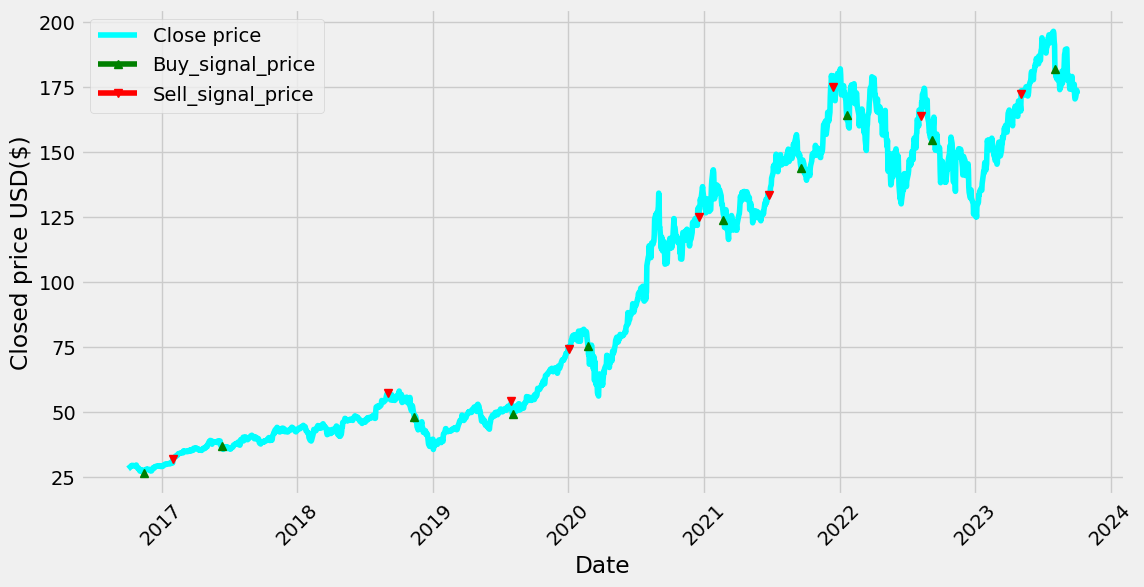

In [22]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'],label='Close price',color='aqua')

plt.plot(df['buy'],label='Buy_signal_price',color='green',marker='^',alpha=1)
plt.plot(df['sell'],label='Sell_signal_price',color='red',marker='v',alpha=1)


plt.xlabel('Date')
plt.ylabel('Closed price USD($)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [23]:
#Daily Returns

df['Daily_Returns']=df['Close'].pct_change(1)
df['Daily_Returns']

Date
2016-10-03         NaN
2016-10-04    0.004266
2016-10-05    0.000443
2016-10-06    0.007430
2016-10-07    0.001493
                ...   
2023-09-27   -0.008897
2023-09-28    0.001526
2023-09-29    0.003046
2023-10-02    0.014836
2023-10-03   -0.007770
Name: Daily_Returns, Length: 1762, dtype: float64

In [24]:
our_profit=buy_sell(df)[2]

print("The profits of our trade are:\n")
for i in range(0,len(our_profit)):
  print(our_profit[i])

print("\n")
print(f"The total profit that we gained or The Net Returns are:\n{sum(our_profit)} USD($)")



The profits of our trade are:

2009.008513035511
5560.614283412402
1293.6383997533503
5136.77334786744
6616.712619644215
779.7350807457606
2166.331516795588
-24.327569695833517
1140.6786957668446


The total profit that we gained or The Net Returns are:
24679.16488732528 USD($)


In [25]:
#Portfolio values over the trades
port_value=buy_sell(df)[3]
print("Portfolio Values")
port_value


Portfolio Values


[12009.008513035511,
 17569.62279644791,
 18863.26119620126,
 24000.0345440687,
 30616.747163712917,
 31396.482244458675,
 33562.81376125426,
 33538.48619155843,
 34679.16488732528]

In [26]:
#Final Portfolio's Value
final_port_value=port_value[-1]
print(f"Final PortFolio Value {final_port_value} USD($)")

Final PortFolio Value 34679.16488732528 USD($)


In [27]:
#Dataframe for .csv file

port_value=buy_sell(df)[3]
new_df=pd.DataFrame()
buypts=[]
sellpts=[]
position=[]
date_buy=[]
date_sell=[]
for i in range(len(df['buy'])):
  if(pd.isna(df['buy'][i])!=True):
    buypts.append(df['buy'][i])
    date_buy.append(df.index[i])
  if(pd.isna(df['sell'][i])!=True):
    sellpts.append(df['sell'][i])
    date_sell.append(df.index[i])
    position.append("Closed")
sellpts.append(np.nan)
date_sell.append(np.nan)
port_value.append(final_port_value)
position.append("Open")

new_df['Buy_Price']=buypts
new_df['Buying Date']=date_buy
new_df['Sell_Price']=sellpts
new_df['Selling Date']=date_sell
new_df['PortFolio values']=port_value
new_df['Position']=position


new_df


,Buy_Price,Buying Date,Sell_Price,Selling Date,PortFolio values,Position
0,26.642500,2016-11-14,31.995001,2017-02-01,12009.008513,Closed
1,36.790001,2017-06-12,57.247501,2018-09-04,17569.622796,Closed
2,47.907501,2018-11-12,54.105000,2019-07-30,18863.261196,Closed
3,49.077499,2019-08-05,74.287498,2020-01-02,24000.034544,Closed
4,75.237503,2020-02-24,125.019997,2020-12-18,30616.747164,Closed
5,123.760002,2021-02-22,133.410004,2021-06-25,31396.482244,Closed
6,143.929993,2021-09-20,175.110001,2021-12-14,33562.813761,Closed
7,164.419998,2022-01-20,164.020004,2022-08-08,33538.486192,Closed
8,154.820007,2022-09-06,172.479996,2023-05-05,34679.164887,Closed
9,182.130005,2023-08-04,NaN,NaT,34679.164887,Open


In [28]:
file_name = "Buy_sell.csv"
new_df.to_csv(file_name,index=False)


In [29]:
wins=0
loss=0
for i in range (len(our_profit)):
  if our_profit[i]>0:
    wins+=1
  else:
    loss+=1
wins


8

In [30]:
#Win rate
win_rate=wins/(len(our_profit))
print(f"win_rate {win_rate}")

#Win/loss ratio
win_loss=wins/loss
print(f"Win-loss ratio {win_loss}")


win_rate 0.8888888888888888
Win-loss ratio 8.0


In [31]:
#The profit and loss making trade and their maximum values:-
print("The Loss making trades are:")
mini=0
maxi=0
for i in range(len(our_profit)):
  if(our_profit[i]<0):
    print(our_profit[i])
    if(our_profit[i]<mini):
      mini=our_profit[i]

print('\n')
print("The maximum loss making trade is")
print(mini)

print('\n')
print("The Profit making trades are:")
for i in range(len(our_profit)):
  if(our_profit[i]>0):
      print(our_profit[i])
      if(our_profit[i]>maxi):
        maxi=our_profit[i]



print('\n')
print("The maximum Profit making trade is")
print(maxi)


The Loss making trades are:
-24.327569695833517


The maximum loss making trade is
-24.327569695833517


The Profit making trades are:
2009.008513035511
5560.614283412402
1293.6383997533503
5136.77334786744
6616.712619644215
779.7350807457606
2166.331516795588
1140.6786957668446


The maximum Profit making trade is
6616.712619644215


In [32]:
#No. of executed trades:-
exe_trade=len(our_profit)

exe_trade

9

In [33]:
#Maximum Drawdown

# Initialize variables for maximum drawdown calculation
peak_value = -float('inf')
trough_value = float('inf')
maximum_drawdown = 0.0

for i in range (0, len(port_value)):
    if port_value[i] > peak_value:
        peak_value = port_value[i]
    else:
        drawdown = (port_value[i]-peak_value)
        if drawdown < maximum_drawdown:
            maximum_drawdown = drawdown
            trough_value = port_value[i]

print("Maximum Drawdown:", maximum_drawdown)






Maximum Drawdown: -24.32756969582988


In [34]:
#Annualised Returns:
final_port_value=port_value[-1]
ann_re=(((final_port_value/10000)**(1/7))-1)*100

print(f"Annualised returns: {ann_re} %")

Annualised returns: 19.44078843289292 %


In [35]:
import statistics
 #Sharpe Ratio
risk_free_rate=4.88     # US 10-year bond rate..

sharpe_ratio=(statistics.mean(our_profit)-risk_free_rate)/(statistics.stdev(our_profit))
print(f"Sharpe Ratio: {sharpe_ratio}")


Sharpe Ratio: 1.1449190521549675


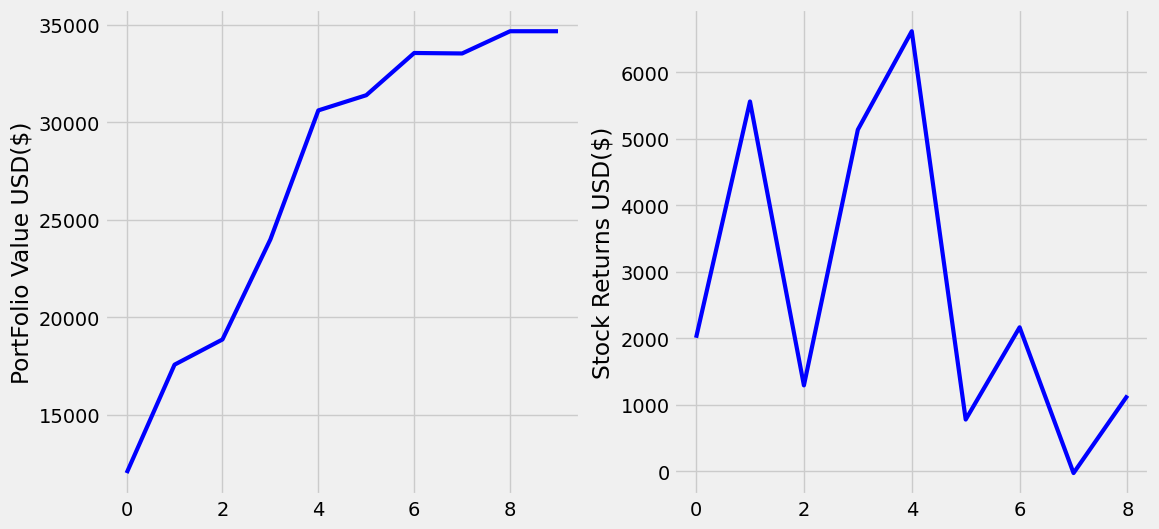

In [36]:
#Graph for portfolio returns & stock returns:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

plt.plot(port_value,color='blue',lw=3)
plt.ylabel("PortFolio Value USD($)")

plt.subplot(1, 2, 2)
plt.plot(our_profit,color='blue',lw=3)
plt.ylabel("Stock Returns USD($)")

plt.show()

In [37]:
# We are gathering the data for index S&P500
asset='SPY' #We are selecting SPY index for analysis.
data2=yf.download(asset,interval='1d',start='2016-10-01',end='2023-10-04')
data2

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-03,215.820007,216.039993,215.039993,215.779999,191.077042,83512100
2016-10-04,215.910004,216.169998,213.990005,214.679993,190.103012,119948100
2016-10-05,215.410004,216.130005,215.330002,215.630005,190.944260,72816000
2016-10-06,215.369995,216.039993,214.740005,215.779999,191.077042,62927400
2016-10-07,216.100006,216.300003,214.190002,215.039993,190.421799,89788300
...,...,...,...,...,...,...
2023-09-27,427.089996,427.670013,422.290009,426.049988,426.049988,104705800
2023-09-28,425.480011,430.250000,424.869995,428.519989,428.519989,92258300
2023-09-29,431.670013,431.850006,425.910004,427.480011,427.480011,115078500


In [38]:
df2=data2

In [39]:
# For SPY index


df2['Midband']=df2['Close'].rolling(window=30).mean()

df2['st_d']=df2['Close'].rolling(window=30).std()

df2['Ub']=df2['Midband']+1.5*df2['st_d']

df2['Lb']=df2['Midband']-1.5*df2['st_d']
df2

,Open,High,Low,Close,Adj Close,Volume,Midband,st_d,Ub,Lb
Date,,,,,,,,,,
2016-10-03,215.820007,216.039993,215.039993,215.779999,191.077042,83512100,NaN,NaN,NaN,NaN
2016-10-04,215.910004,216.169998,213.990005,214.679993,190.103012,119948100,NaN,NaN,NaN,NaN
2016-10-05,215.410004,216.130005,215.330002,215.630005,190.944260,72816000,NaN,NaN,NaN,NaN
2016-10-06,215.369995,216.039993,214.740005,215.779999,191.077042,62927400,NaN,NaN,NaN,NaN
2016-10-07,216.100006,216.300003,214.190002,215.039993,190.421799,89788300,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-09-27,427.089996,427.670013,422.290009,426.049988,426.049988,104705800,441.524669,7.223610,452.360084,430.689255
2023-09-28,425.480011,430.250000,424.869995,428.519989,428.519989,92258300,441.154002,7.599191,452.552789,429.755215
2023-09-29,431.670013,431.850006,425.910004,427.480011,427.480011,115078500,440.860335,7.955514,452.793606,428.927064


In [40]:
obv(df2)   #Calling OBV function for SPY index

,Open,High,Low,Close,Adj Close,Volume,Midband,st_d,Ub,Lb,OBV,OBV_EMA
Date,,,,,,,,,,,,
2016-10-03,215.820007,216.039993,215.039993,215.779999,191.077042,83512100,NaN,NaN,NaN,NaN,0,0.000000e+00
2016-10-04,215.910004,216.169998,213.990005,214.679993,190.103012,119948100,NaN,NaN,NaN,NaN,-119948100,-6.297275e+07
2016-10-05,215.410004,216.130005,215.330002,215.630005,190.944260,72816000,NaN,NaN,NaN,NaN,-47132100,-5.715616e+07
2016-10-06,215.369995,216.039993,214.740005,215.779999,191.077042,62927400,NaN,NaN,NaN,NaN,15795300,-3.609620e+07
2016-10-07,216.100006,216.300003,214.190002,215.039993,190.421799,89788300,NaN,NaN,NaN,NaN,-73993000,-4.526311e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-27,427.089996,427.670013,422.290009,426.049988,426.049988,104705800,441.524669,7.223610,452.360084,430.689255,688454300,8.025089e+08
2023-09-28,425.480011,430.250000,424.869995,428.519989,428.519989,92258300,441.154002,7.599191,452.552789,429.755215,780712600,8.004330e+08
2023-09-29,431.670013,431.850006,425.910004,427.480011,427.480011,115078500,440.860335,7.955514,452.793606,428.927064,665634100,7.875950e+08


In [41]:
RSI(df2)    #Calling RSI function for SPY index

,Open,High,Low,Close,Adj Close,Volume,Midband,st_d,Ub,Lb,OBV,OBV_EMA,price change,RSI,Overbought,Oversold
Date,,,,,,,,,,,,,,,,
2016-10-03,215.820007,216.039993,215.039993,215.779999,191.077042,83512100,NaN,NaN,NaN,NaN,0,0.000000e+00,NaN,NaN,90,30
2016-10-04,215.910004,216.169998,213.990005,214.679993,190.103012,119948100,NaN,NaN,NaN,NaN,-119948100,-6.297275e+07,-0.005098,0.000000,90,30
2016-10-05,215.410004,216.130005,215.330002,215.630005,190.944260,72816000,NaN,NaN,NaN,NaN,-47132100,-5.715616e+07,0.004425,49.591955,90,30
2016-10-06,215.369995,216.039993,214.740005,215.779999,191.077042,62927400,NaN,NaN,NaN,NaN,15795300,-3.609620e+07,0.000696,53.683881,90,30
2016-10-07,216.100006,216.300003,214.190002,215.039993,190.421799,89788300,NaN,NaN,NaN,NaN,-73993000,-4.526311e+07,-0.003429,36.932418,90,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-27,427.089996,427.670013,422.290009,426.049988,426.049988,104705800,441.524669,7.223610,452.360084,430.689255,688454300,8.025089e+08,0.000399,23.289031,90,30
2023-09-28,425.480011,430.250000,424.869995,428.519989,428.519989,92258300,441.154002,7.599191,452.552789,429.755215,780712600,8.004330e+08,0.005797,31.540564,90,30
2023-09-29,431.670013,431.850006,425.910004,427.480011,427.480011,115078500,440.860335,7.955514,452.793606,428.927064,665634100,7.875950e+08,-0.002427,30.009109,90,30


In [42]:
df2['buy']=buy_sell(df2)[0]
df2['sell']=buy_sell(df2)[1]


df2

,Open,High,Low,Close,Adj Close,Volume,Midband,st_d,Ub,Lb,OBV,OBV_EMA,price change,RSI,Overbought,Oversold,Position,buy,sell
Date,,,,,,,,,,,,,,,,,,,
2016-10-03,215.820007,216.039993,215.039993,215.779999,191.077042,83512100,NaN,NaN,NaN,NaN,0,0.000000e+00,NaN,NaN,90,30,0,NaN,NaN
2016-10-04,215.910004,216.169998,213.990005,214.679993,190.103012,119948100,NaN,NaN,NaN,NaN,-119948100,-6.297275e+07,-0.005098,0.000000,90,30,0,NaN,NaN
2016-10-05,215.410004,216.130005,215.330002,215.630005,190.944260,72816000,NaN,NaN,NaN,NaN,-47132100,-5.715616e+07,0.004425,49.591955,90,30,0,NaN,NaN
2016-10-06,215.369995,216.039993,214.740005,215.779999,191.077042,62927400,NaN,NaN,NaN,NaN,15795300,-3.609620e+07,0.000696,53.683881,90,30,0,NaN,NaN
2016-10-07,216.100006,216.300003,214.190002,215.039993,190.421799,89788300,NaN,NaN,NaN,NaN,-73993000,-4.526311e+07,-0.003429,36.932418,90,30,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-27,427.089996,427.670013,422.290009,426.049988,426.049988,104705800,441.524669,7.223610,452.360084,430.689255,688454300,8.025089e+08,0.000399,23.289031,90,30,1,NaN,NaN
2023-09-28,425.480011,430.250000,424.869995,428.519989,428.519989,92258300,441.154002,7.599191,452.552789,429.755215,780712600,8.004330e+08,0.005797,31.540564,90,30,1,NaN,NaN
2023-09-29,431.670013,431.850006,425.910004,427.480011,427.480011,115078500,440.860335,7.955514,452.793606,428.927064,665634100,7.875950e+08,-0.002427,30.009109,90,30,1,NaN,NaN


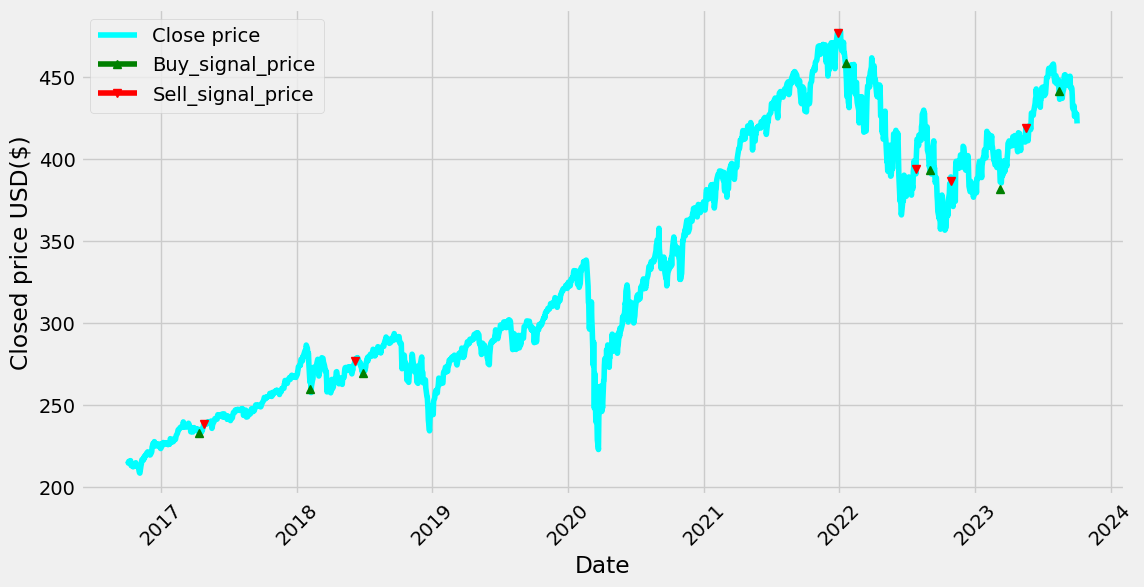

In [44]:
#For SPY index.
plt.figure(figsize=(12,6))
plt.plot(df2['Close'],label='Close price',color='aqua')
plt.plot(df2['buy'],label='Buy_signal_price',color='green',marker='^',alpha=1)
plt.plot(df2['sell'],label='Sell_signal_price',color='red',marker='v',alpha=1)


plt.xlabel('Date')
plt.ylabel('Closed price USD($)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [45]:
#Benchmark returns
bench_port_value=buy_sell(df2)[3]

print(f"The Net Benchmark Returns are:\n{bench_port_value[-1]-10000} USD($)")

The Net Benchmark Returns are:
7985.817944469425 USD($)


In [48]:
# Sharpe ratio for benchmark.
bench_profit=buy_sell(df2)[2]
risk_free_rate=4.88        # US 10-year bond rate..

sharpe_ratio2=(statistics.mean(bench_profit)-risk_free_rate)/(statistics.stdev(bench_profit))

sharpe_ratio2

0.4101810834117763